### Training and Testing Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv('/home/dhpcap/ML_module/project/kagg/Training.csv')

In [4]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
train_df = train_df.drop(columns=["Unnamed: 133"], errors='ignore')

In [6]:
train_df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [7]:
train_df["prognosis"].value_counts()

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [9]:
X = train_df.drop(columns=["prognosis"])
y = train_df["prognosis"]

In [10]:
label = LabelEncoder()
y_encoded = label.fit_transform(y)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

In [12]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({"Feature" : feature_names, "Importance" : importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df.head(50))

                            Feature  Importance
97                      muscle_pain    0.019439
0                           itching    0.016014
98                altered_sensorium    0.016001
33                       dark_urine    0.015811
25                       high_fever    0.015623
41                       mild_fever    0.015100
106                  family_history    0.014786
34                           nausea    0.014670
43                yellowing_of_eyes    0.014079
28                         sweating    0.013823
86                     unsteadiness    0.013589
56                       chest_pain    0.013119
14                          fatigue    0.012688
39                   abdominal_pain    0.012670
6                        joint_pain    0.012629
40                        diarrhoea    0.012459
109           lack_of_concentration    0.011938
99              red_spots_over_body    0.011681
35                 loss_of_appetite    0.011402
11                         vomiting    0

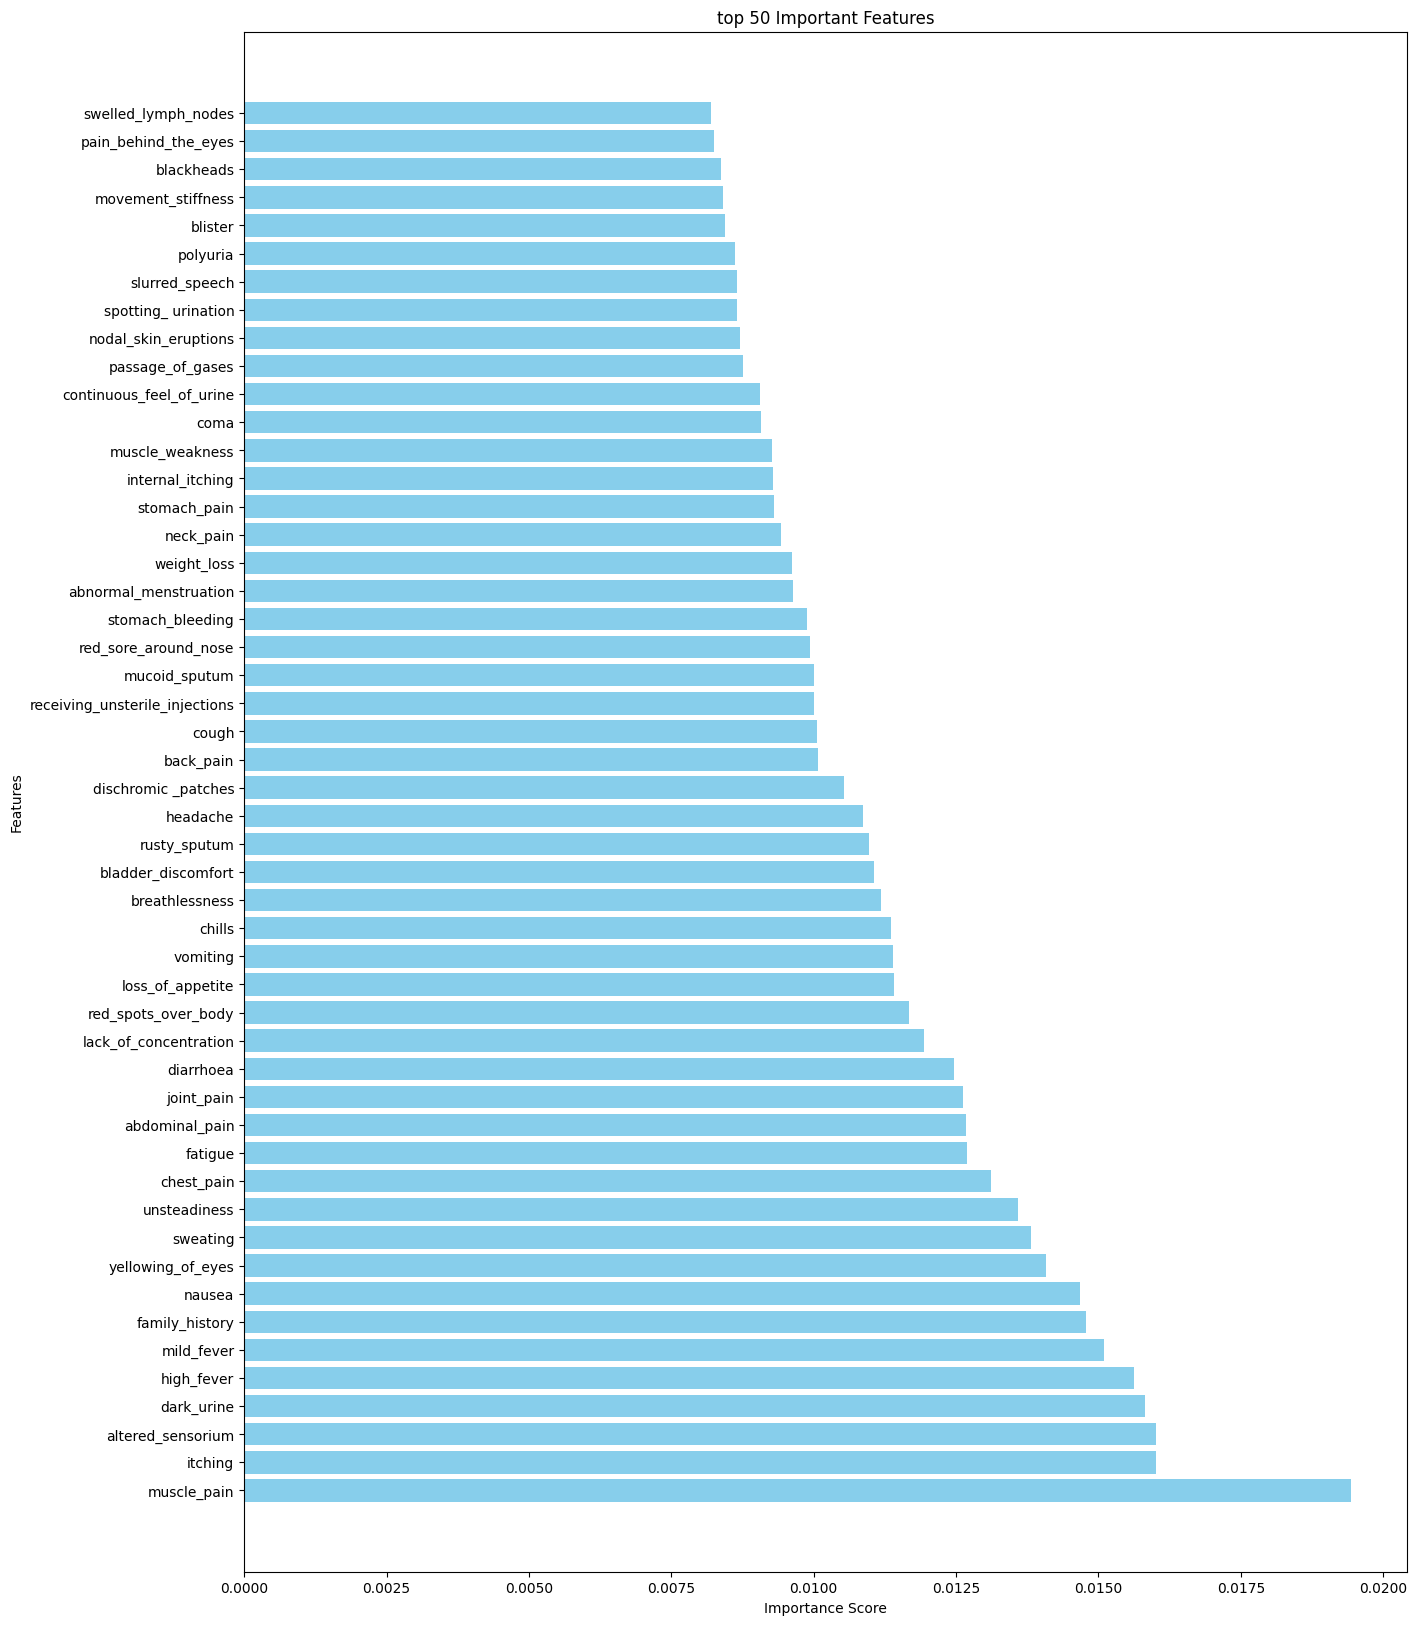

In [13]:
plt.figure(figsize=(15,20))
plt.barh(importance_df["Feature"][:50], importance_df["Importance"][:50], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("top 50 Important Features")
#plt.gca().import_yaxis()
plt.show()

In [14]:
top_50_features = importance_df["Feature"].iloc[:50].values

X = train_df[top_50_features]
y = train_df["prognosis"]

In [15]:
label = LabelEncoder()
y_encoded = label.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [16]:
rf = RandomForestClassifier(n_estimators=40, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
print("Random Forest Classification Report : ")
print(classification_report(y_test, rf_predictions, target_names= label.classes_))
print(f"Random_Forest Accuracy : {accuracy_score(y_test, rf_predictions):.2f}\n\n")


Random Forest Classification Report : 
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      0.93      0.97        30
                                   Acne       1.00      0.92      0.96        24
                    Alcoholic hepatitis       0.96      1.00      0.98        25
                                Allergy       1.00      0.88      0.93        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       0.96      1.00      0.98        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.0

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores : ", scores)
print("Mean Accuracy : ", scores.mean())

Cross-Validation Accuracy Scores :  [0.97052846 0.9745935  0.98780488 1.         1.        ]
Mean Accuracy :  0.9865853658536586


In [18]:
test_2 = train_df[top_50_features]

predictions_encoded = rf.predict(test_2)
predictions = label.inverse_transform(predictions_encoded)

count = 0

for i, disease in enumerate(predictions):
    print(f"Row {i+1} : Predicted Disease - {disease}")
    
    if count == 10:
        break
    count += 1

Row 1 : Predicted Disease - Fungal infection
Row 2 : Predicted Disease - Fungal infection
Row 3 : Predicted Disease - Fungal infection
Row 4 : Predicted Disease - Fungal infection
Row 5 : Predicted Disease - Fungal infection
Row 6 : Predicted Disease - Fungal infection
Row 7 : Predicted Disease - Fungal infection
Row 8 : Predicted Disease - Fungal infection
Row 9 : Predicted Disease - Fungal infection
Row 10 : Predicted Disease - Fungal infection
Row 11 : Predicted Disease - Allergy


In [19]:
train_df["prognosis"].head(10)

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
5    Fungal infection
6    Fungal infection
7    Fungal infection
8    Fungal infection
9    Fungal infection
Name: prognosis, dtype: object

In [20]:
predictions = label.inverse_transform(predictions_encoded)
train_df['predicted_prognosis'] = predictions

mismatches = (train_df['prognosis'] != train_df['predicted_prognosis'])
mismatch_count = mismatches.sum()

In [21]:
print(train_df[['prognosis', 'predicted_prognosis']].head(10))
print(f"Total mismatches : {mismatch_count} out of {len(train_df)} samples.")

          prognosis predicted_prognosis
0  Fungal infection    Fungal infection
1  Fungal infection    Fungal infection
2  Fungal infection    Fungal infection
3  Fungal infection    Fungal infection
4  Fungal infection    Fungal infection
5  Fungal infection    Fungal infection
6  Fungal infection    Fungal infection
7  Fungal infection    Fungal infection
8  Fungal infection    Fungal infection
9  Fungal infection    Fungal infection
Total mismatches : 66 out of 4920 samples.
